In [ ]:
# Code to read csv file into colaboratory:
%matplotlib inline
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
from sklearn import metrics

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [ ]:

import seaborn as sns
from __future__ import division
from datetime import datetime, timedelta,date
from sklearn.cluster import KMeans
import plotly.offline as pyoff
import plotly.graph_objs as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1EVww4qdbPtQH9m-Z14VFkeYgupSLbZzH'}) # replace the id with id of file you want to access
downloaded.GetContentFile('transactions.csv')

In [ ]:
downloaded = drive.CreateFile({'id':'1uNu3dialr_tkRI4DV6wP-tMR7kSTSW_w'}) # replace the id with id of file you want to access
downloaded.GetContentFile('product.csv')

In [ ]:
downloaded = drive.CreateFile({'id':'1EGrP0gokVNOUB5crmXnB86OtyS2a2UOq'}) # replace the id with id of file you want to access
downloaded.GetContentFile('causal.csv')

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1_AWBqiYc3-jmAg9G4ADJLPdmjtdahTng'}) # replace the id with id of file you want to access
downloaded.GetContentFile('months.csv')

In [ ]:
data2 = pd.read_csv("product.csv")

In [ ]:
data1 = pd.read_csv("transactions.csv")

In [ ]:
data3 = pd.read_csv("causal.csv")

In [ ]:
data4 = pd.read_csv("months.csv")

In [ ]:
datamerge14= pd.merge(data1,data4, on='day', how='left')

In [ ]:
datamerge14.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,month
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,01-01-2010
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,01-01-2010
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,01-01-2010
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,01-01-2010
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,01-01-2010


# Market Basket Analysis

In [ ]:
datamerge12= pd.merge(data1,data2, on='upc', how='left')

In [ ]:
datamerge12.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

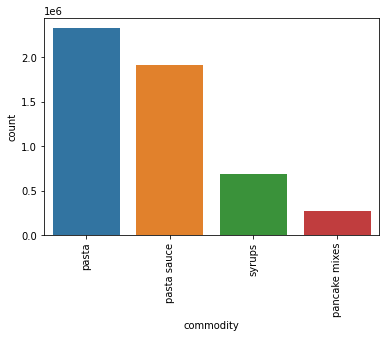

In [ ]:
sns.countplot(x = 'commodity', data = datamerge12, order = datamerge12['commodity'].value_counts().iloc[:100].index)
plt.xticks(rotation=90)

In [ ]:
seriesObj = datamerge12.apply(lambda x: True if x['commodity'] == "pasta" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

2327944


In [ ]:
bread= datamerge12[['basket', 'commodity']]

In [ ]:
df = bread.groupby(['basket', 'commodity']).size().reset_index(name='count')
basket = (df.groupby(['basket', 'commodity'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('basket'))
#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets

commodity,pancake mixes,pasta,pasta sauce,syrups
basket,,,,
1,0,1,1,0
2,1,0,0,0
3,0,1,0,0
4,0,1,1,0
5,0,1,0,1
...,...,...,...,...
3316345,0,0,0,1
3316346,0,1,1,0
3316347,0,1,0,0


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,"(pasta sauce, syrups)",(pasta),0.028448,0.591309,0.017168,0.603496,1.020609,0.000347,1.030735
2,(pasta sauce),(pasta),0.465557,0.591309,0.247212,0.531003,0.898012,-0.028076,0.871414
5,"(syrups, pasta)",(pasta sauce),0.033083,0.465557,0.017168,0.518931,1.114646,0.001766,1.110949
3,(pasta),(pasta sauce),0.591309,0.465557,0.247212,0.418075,0.898012,-0.028076,0.918407
1,(pancake mixes),(syrups),0.079578,0.198645,0.032470,0.408030,2.054070,0.016662,1.353710
0,(syrups),(pancake mixes),0.198645,0.079578,0.032470,0.163458,2.054070,0.016662,1.100270
6,(pasta sauce),"(syrups, pasta)",0.465557,0.033083,0.017168,0.036876,1.114646,0.001766,1.003938
7,(pasta),"(pasta sauce, syrups)",0.591309,0.028448,0.017168,0.029034,1.020609,0.000347,1.000604


# Store Level

In [ ]:
datamerge12.head(1)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size
0,7680850106,0.8,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ


In [ ]:
data1.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [ ]:
data1[data1['dollar_sales'] < 0]['dollar_sales'].value_counts().sum()

4504

In [ ]:
data1 = data1[data1['dollar_sales'] >= 0]

In [ ]:
st_revenue = data1.groupby(['store'])['dollar_sales'].sum().reset_index()

In [ ]:
st_revenue

,store,dollar_sales
0,1,20762.07
1,2,23251.75
2,3,26522.76
3,4,16259.68
4,5,32112.83
...,...,...
382,383,28980.47
383,384,11782.05
384,385,4056.62
385,386,4147.81


In [ ]:
plot_data = [
    go.Bar(
        x=st_revenue['store'],
        y=st_revenue['dollar_sales'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Store revenue'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(st_revenue[['dollar_sales']])
st_revenue['storeCluster'] = kmeans.predict(st_revenue[['dollar_sales']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [ ]:
st_revenue = order_cluster('storeCluster', 'dollar_sales',st_revenue,False)

In [ ]:
st_revenue

,store,dollar_sales,storeCluster
0,1,20762.07,2
1,2,23251.75,2
2,3,26522.76,2
3,6,22636.41,2
4,8,19717.48,2
...,...,...,...
382,368,47165.78,0
383,371,55204.99,0
384,373,44495.84,0
385,375,55007.43,0


In [ ]:
st_revenue.groupby('storeCluster')['dollar_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
storeCluster,,,,,,,,
0,18.0,51301.826667,6819.998816,43535.15,44970.1025,49948.325,55168.6025,63616.48
1,111.0,32158.358919,3594.918778,27080.18,29420.7600,31147.050,34526.8850,40699.43
2,157.0,21861.174841,2734.875260,17253.05,19441.5600,21690.980,24208.2300,26750.66
3,101.0,11937.662475,4187.634102,812.36,9510.2400,12802.660,15544.5000,16888.18


In [ ]:
st_revenue = st_revenue.drop(['dollar_sales'], axis = 1) 

In [ ]:
st_revenue

,store,storeCluster
0,1,2
1,2,2
2,3,2
3,6,2
4,8,2
...,...,...
382,368,0
383,371,0
384,373,0
385,375,0


In [ ]:
datamerge13= pd.merge(datamerge12,st_revenue, on='store', how='left')

In [ ]:
datamerge13

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,storeCluster
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,1
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,1
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,,1
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,1
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197676,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0,PRIVATE LABEL THIN SPAGHETTI,pasta,Private Label,N 7 OZ,3
5197677,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0,PRIVATE LABEL SPAGHTTI SAUCE MEAT,pasta sauce,Private Label,26 OZ,3
5197678,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0,PRIVATE LABEL LASAGNA PASTA,pasta,Private Label,16 OZ,2
5197679,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0,RAGU OWS SPAG SAUCE MEAT,pasta sauce,Ragu,26 OZ,2


In [ ]:
seriesObj = datamerge13.apply(lambda x: True if x['storeCluster'] == 0 and x['commodity'] == "pancake mixes" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

23536


In [ ]:
seriesObj = datamerge13.apply(lambda x: True if x['storeCluster'] == 0 and x['commodity'] == "syrups" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

64418


In [ ]:
seriesObj = datamerge13.apply(lambda x: True if x['storeCluster'] == 0 and x['commodity'] == "pasta" else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index)
print(numOfRows)

230633


Text(0, 0.5, 'Frequency')

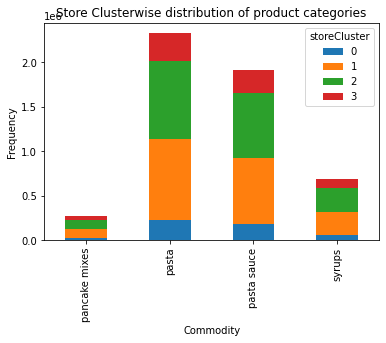

In [ ]:
data_dow_status = datamerge13.groupby(['commodity', 'storeCluster'])['commodity'].count().unstack('storeCluster').fillna(0)
data_dow_status[[0, 1, 2, 3]].plot(kind='bar', stacked=True)
plt.title('Store Clusterwise distribution of product categories')
plt.xlabel('Commodity')
plt.ylabel('Frequency')